In [225]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [244]:
train = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Train.csv')
test = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Test.csv')

In [245]:
train.head(4)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800


In [246]:
#EDA

In [247]:
#Lets see the shape of train data

train.shape

(8523, 12)

In [248]:
#With this it shows that there are 8523 rows and 12 columns

In [249]:
train.describe() #Lets see how the train data is distributed

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [250]:
train.isnull().sum() #with it we found that there is no null values in it.

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [251]:
test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [252]:
#With it we can see that there are null values in the column, Item_Weight and Outlet_Size

In [253]:
#Contatenating both the sets for further analysis.
train['source'] = 'train'
test['source'] = 'test'
data= pd.concat([train,test])

In [254]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

In [255]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


In [256]:
#With this we see that there are null values in the Item_Weight, Outlet_Size and Item_Outlet_Sales

In [257]:
print("Item_Weight\n", data['Item_Weight'].value_counts())
print("\nOutlet_Size\n", data['Outlet_Size'].value_counts())
print("\nItem_Outlet_Sales\n", data['Item_Outlet_Sales'].value_counts())

Item_Weight
 17.600    135
12.150    127
10.500    123
13.650    115
11.800    113
         ... 
5.210       7
7.960       7
4.615       6
9.035       6
7.850       6
Name: Item_Weight, Length: 415, dtype: int64

Outlet_Size
 Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

Item_Outlet_Sales
 958.7520     17
1342.2528    16
1845.5976    15
703.0848     15
1278.3360    14
             ..
3167.8764     1
2226.4352     1
1684.4740     1
1574.6170     1
6692.6216     1
Name: Item_Outlet_Sales, Length: 3493, dtype: int64


In [258]:
#filling na values of Item_Weight and Item_Outlet_Sales column with mean, Outlet_Size with mode.

train['Item_Weight'] = train['Item_Weight'].fillna(train['Item_Weight'].mean())
train['Outlet_Size'] = train['Outlet_Size'].fillna(train['Outlet_Size'].mode()[0])


test['Item_Weight'] = test['Item_Weight'].fillna(test['Item_Weight'].mean())
test['Outlet_Size'] = test['Outlet_Size'].fillna(test['Outlet_Size'].mode()[0])

In [260]:
test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
source                       0
dtype: int64

In [264]:
#Contatenating both the sets for further analysis.
train['source'] = 'train'
test['source'] = 'test'
data= pd.concat([train,test])

In [265]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

In [266]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


In [267]:
from sklearn.preprocessing import LabelEncoder

In [268]:
train = train.astype('category')
train.dtypes

Item_Identifier              category
Item_Weight                  category
Item_Fat_Content             category
Item_Visibility              category
Item_Type                    category
Item_MRP                     category
Outlet_Identifier            category
Outlet_Establishment_Year    category
Outlet_Size                  category
Outlet_Location_Type         category
Outlet_Type                  category
Item_Outlet_Sales            category
source                       category
dtype: object

In [269]:
LE = LabelEncoder()

data['Outlet_Identifier'] = LE.fit_transform(data['Outlet_Identifier'])
data['Item_Identifier'] = LE.fit_transform(data['Item_Identifier'])
var_mod = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Type','Outlet_Type']
for i in var_mod:
    data[i] = LE.fit_transform(data[i])

In [270]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,156,9.30,1,0.016047,4,249.8092,9,1999,1,0,1,3735.1380,train
1,8,5.92,2,0.019278,14,48.2692,3,2009,1,2,2,443.4228,train
2,662,17.50,1,0.016760,10,141.6180,9,1999,1,0,1,2097.2700,train
3,1121,19.20,2,0.000000,6,182.0950,0,1998,1,2,0,732.3800,train
4,1297,8.93,1,0.000000,9,53.8614,1,1987,0,2,1,994.7052,train


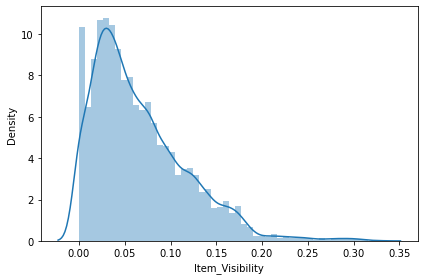

In [271]:
#Plotting dist plot to check for skewness, showing that data is bit of skewed
sns.distplot(data['Item_Visibility'])
plt.tight_layout()

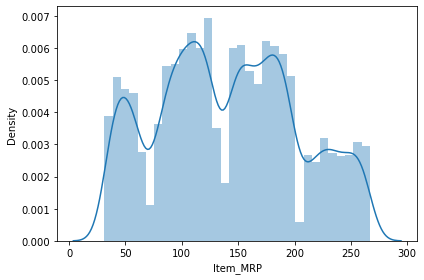

In [272]:
sns.distplot(data['Item_MRP'])
plt.tight_layout()

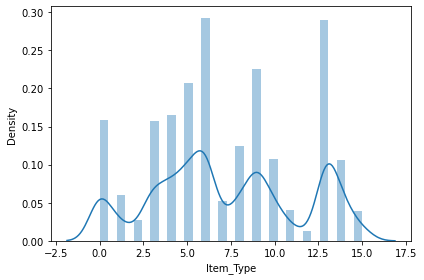

In [273]:
sns.distplot(data['Item_Type'])
plt.tight_layout()

In [274]:
#With the above plots it looks like there is little bit of skewness in the column Item_Visibility which we will remove 
#with the method quantile.

In [275]:
#Using quantile method to remove the skewness of newspaper column
q = data['Item_Visibility'].quantile(0.98)
data = data[data['Item_Visibility']<q]

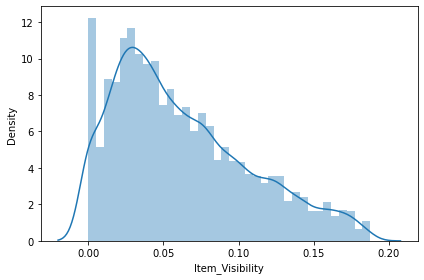

In [276]:
#Plotting dist plot to check for skewness
sns.distplot(data['Item_Visibility'])
plt.tight_layout()

In [197]:
#Now the data looks good, we will proceed ahead and check the relation of each feature with the label to see if they are positively related or not.

In [198]:
#Now will check the collinearity between the features with the help of heatmap.

In [277]:
corr_mat = data.corr()
corr_mat

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Identifier,1.000000,0.047310,-0.097650,-0.039685,-0.010013,0.011868,-0.003833,-0.004827,0.003825,-0.002502,-0.008623,0.000508
Item_Weight,0.047310,1.000000,-0.027068,-0.010612,0.028198,0.032466,0.001426,0.000704,0.001206,-0.000922,-0.000057,0.009396
Item_Fat_Content,-0.097650,-0.027068,1.000000,0.033102,-0.121604,-0.005574,0.000087,-0.002628,-0.008376,-0.002308,0.000490,0.011271
Item_Visibility,-0.039685,-0.010612,0.033102,1.000000,-0.036590,-0.001935,-0.049261,-0.035837,0.029863,-0.005931,-0.073738,-0.066466
Item_Type,-0.010013,0.028198,-0.121604,-0.036590,1.000000,0.041373,-0.000181,0.002889,-0.002535,0.002527,0.002797,0.016210
Item_MRP,0.011868,0.032466,-0.005574,-0.001935,0.041373,1.000000,-0.001877,-0.000899,-0.000294,0.000677,-0.001927,0.577690
Outlet_Identifier,-0.003833,0.001426,0.000087,-0.049261,-0.000181,-0.001877,1.000000,0.077309,0.516210,-0.723046,0.073558,0.145927
Outlet_Establishment_Year,-0.004827,0.000704,-0.002628,-0.035837,0.002889,-0.000899,0.077309,1.000000,0.219669,-0.113755,-0.151154,-0.067379
Outlet_Size,0.003825,0.001206,-0.008376,0.029863,-0.002535,-0.000294,0.516210,0.219669,1.000000,-0.607732,-0.190905,-0.075662
Outlet_Location_Type,-0.002502,-0.000922,-0.002308,-0.005931,0.002527,0.000677,-0.723046,-0.113755,-0.607732,1.000000,0.481143,0.088183


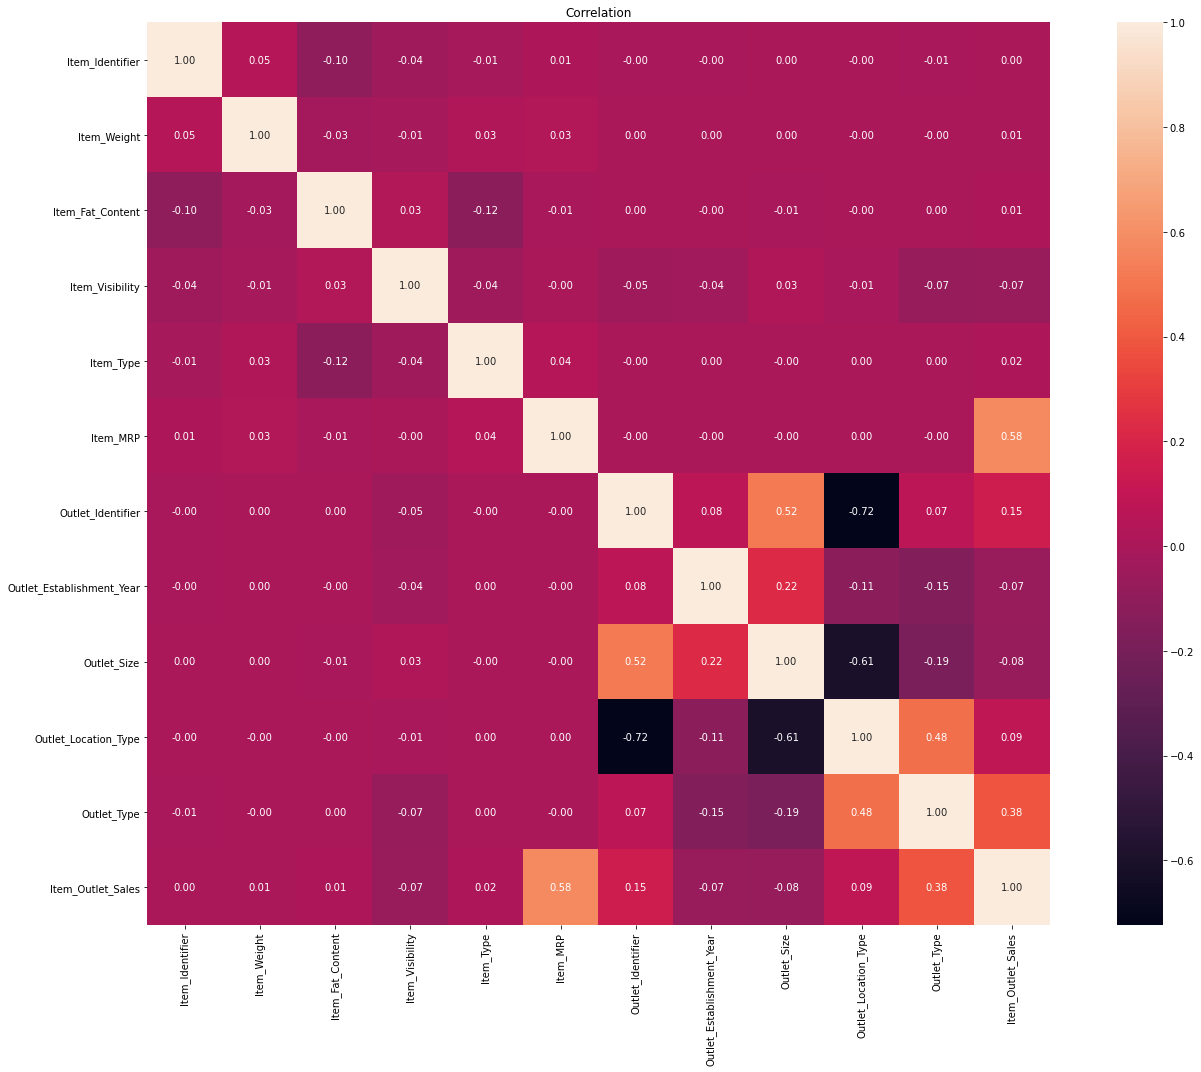

In [278]:
plt.figure(figsize = [20,15])
sns.heatmap(corr_mat,annot=True,cbar=True,square=True,fmt='.2f')
plt.title('Correlation')
plt.tight_layout()

In [279]:
# with above observation we see that there is no collinearity among the featues so we are good to go with model building.

In [280]:
#Now we will devide the dataset into train and test depending on the sources.
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,156,9.30,1,0.016047,4,249.8092,9,1999,1,0,1,3735.1380,train
1,8,5.92,2,0.019278,14,48.2692,3,2009,1,2,2,443.4228,train
2,662,17.50,1,0.016760,10,141.6180,9,1999,1,0,1,2097.2700,train
3,1121,19.20,2,0.000000,6,182.0950,0,1998,1,2,0,732.3800,train
4,1297,8.93,1,0.000000,9,53.8614,1,1987,0,2,1,994.7052,train


In [281]:
train = data.loc[data['source'] == 'train']

In [282]:
test = data.loc[data['source'] == 'test']

In [283]:
train.drop(['source'], axis =1, inplace =True)

In [284]:
test.drop(['source','Item_Outlet_Sales'], axis =1, inplace =True)

In [285]:
x_train = train.drop(['Item_Outlet_Sales'],axis = 1)
y_train = train['Item_Outlet_Sales']
x_test = test

In [286]:
#Build the model

In [287]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [288]:
#Now Model Initiating and Training

In [289]:
LR = LinearRegression()
DT = DecisionTreeRegressor()
RF = RandomForestRegressor()
SVR = SVR()

In [290]:
LR.fit(x_train,y_train)
DT.fit(x_train,y_train)
RF.fit(x_train,y_train)
SVR.fit(x_train,y_train)
print("All Models Trained")

All Models Trained


In [291]:
#Prediction Scores for each trained model

In [292]:
LR.score(x_train,y_train)

0.5045514094289574

In [293]:
DT.score(x_train,y_train)

1.0

In [294]:
RF.score(x_train,y_train)

0.9367195340184433

In [295]:
SVR.score(x_train,y_train)

-0.045996298761940446

In [296]:
#With the above adjusted r2 score of all the models we see that Decision Tree Regressor is giving us the best prediction.

In [297]:
#Now will check the mean squared error of each trained model.

In [298]:
##Doing hyper parameter tuning for it

In [318]:
from sklearn.model_selection import GridSearchCV

In [319]:
params = {
          'max_depth' : [2,4,6,8,10,12],
         'min_samples_leaf': [4,3,2],
         'min_samples_split': [8,7,6]}

In [320]:
DT.get_params().keys()

dict_keys(['ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'presort', 'random_state', 'splitter'])

In [321]:
grid = GridSearchCV(DT, param_grid= params, cv= 8, n_jobs=-1)

In [322]:
grid.fit(x_train,y_train)

GridSearchCV(cv=8, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [2, 4, 6, 8, 10, 12],
                         'min_samples_leaf': [4, 3, 2],
                         'min_samples_split': [8, 7, 6]})

In [323]:
print('Best Estimators == > \n', grid.best_params_)

Best Estimators == > 
 {'max_depth': 6, 'min_samples_leaf': 4, 'min_samples_split': 7}


In [324]:
#Reinstantiating classifier with the best parameters

clf = grid.best_estimator_

In [325]:
clf.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=6, min_samples_leaf=4, min_samples_split=7)

In [315]:
y_pred =  clf.predict(x_test)

In [331]:
clf.score(x_train, y_train)

0.6033219750568679

In [333]:
import joblib

In [334]:
filename = 'Big_Mart.sav'
joblib.dump(clf, filename)

['Big_Mart.sav']